In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
path = 'train.csv'

df = pd.read_csv(path)
#df.head()

In [3]:
df.drop(['PassengerId','Name','Ticket'], axis=1,inplace=True)

In [4]:
from read_file import read_file
read_file(path)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
def chk_types(df):
    dtypes = df.dtypes
    n_unique = df.nunique()
    return pd.DataFrame({'dtypes': dtypes, 'n_unique': n_unique}).transpose()
chk_types(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
dtypes,int64,int64,object,float64,int64,int64,float64,object,object
n_unique,2,3,2,88,7,7,248,147,3


In [6]:
from process import chk_types
chk_types(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
dtypes,int64,int64,object,float64,int64,int64,float64,object,object
n_unique,2,3,2,88,7,7,248,147,3


In [7]:
cols = ['Survived' , 'Pclass' ,'Sex' , 'Parch' , 'SibSp' , 'Embarked']
df[cols] = df[cols].astype('category')
chk_types(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
dtypes,category,category,category,float64,category,category,float64,object,category
n_unique,2,3,2,88,7,7,248,147,3


In [8]:
null = df.isnull().sum()
print("Missing value count:")
ratio = ((null / df.shape[0]) * 100).round(2).astype(str) + '%'
pd.DataFrame({'Null_sum': null, 'Null_ratio %': ratio}).T

Missing value count:


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Null_sum,0,0,0,177,0,0,0,687,2
Null_ratio %,0.0%,0.0%,0.0%,19.87%,0.0%,0.0%,0.0%,77.1%,0.22%


In [9]:
df1 = df.dropna(subset=['Embarked'])
df2 = df1.copy()  # 'Cabin' column is already dropped, so just copy df1

In [10]:
df.shape

(891, 9)

In [11]:
median = df1['Age'].median()
df1['Age'].fillna(median, inplace=True)

In [12]:
df.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
5,0,3,male,NaN,0,0,8.4583,NaN,Q
6,0,1,male,54.0,0,0,51.8625,E46,S
7,0,3,male,2.0,3,1,21.0750,NaN,S
8,1,3,female,27.0,0,2,11.1333,NaN,S
9,1,2,female,14.0,1,0,30.0708,NaN,C


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
plt.figure(figsize=(2,2))
agg = df.pivot_table(index='Survived',columns ='sex', values='Age' , aggfunc=len)
sns.heatmap(agg)
plt.show()

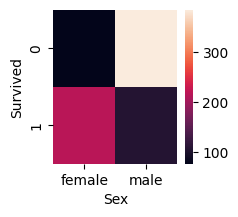

In [32]:
plt.figure(figsize=(2,2))
agg = df.pivot_table(index='Survived', columns='Sex', values='Age', aggfunc=len)
sns.heatmap(agg)
plt.show()


In [23]:
df.duplicated().sum()

np.int64(107)

In [25]:
df.drop_duplicates(inplace=True)

In [26]:
df.duplicated().sum()

np.int64(0)

In [31]:
x = df.drop("Survived" , axis =1)
y = df['Survived']


In [28]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,NaN,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,NaN,S


In [33]:
x = df.iloc[:,:]

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_cols = x.select_dtypes('number').columns
scaler.fit(x[num_cols])
x[num_cols] = scaler.transform(x[num_cols])


In [35]:
x.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,0.271174,1,0,0.014151,NaN,S
1,1,1,female,0.472229,1,0,0.139136,C85,C
2,1,3,female,0.321438,0,0,0.015469,NaN,S
3,1,1,female,0.434531,1,0,0.103644,C123,S
4,0,3,male,0.434531,0,0,0.015713,NaN,S


In [42]:
from category_encoders import OneHotEncoder
str_c = ['Sex','Embraked']


encoder = OneHotEncoder(cols = str_c , drop_invariant=True) 
X = encoder.fit_transform(x)
x.head()


ValueError: X does not contain the columns listed in cols